In [15]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

# Error Estimation for Survey Data
the issue we have is the following: we are drawing indendent random numbers from a binary distribution of probability $p$ (think: the probability of a certain person liking the color blue) and we have two groups (think: male and female). Those two groups dont necessarily have the same size.

The question we ask is what difference we can expect in the spread of the ex-post estimation of $p$

We first define our population parameters

In [16]:
N_people = 500
ratio_female = 0.30
proba = 0.40

## Closed Form Approximation
of course we could have done this analytically using Normal approximation: we have two independent Normal random variables, both with expectation $p$. The variance of the $male$ variable is $p(1-p)/N_{male}$ and the one of the female one accordingly. The overall variance of the difference (or sum, it does not matter here because they are uncorrelated) is
$$
var = p(1-p)\times \left(\frac{1}{N_{male}} + \frac{1}{N_{female}}\right)
$$
Using the female/male ratio $r$ instead we can write for the standard deviation
$$
sd = \sqrt{var} = \sqrt{\frac{1}{N}\frac{p(1-p)}{r(1-r)}}
$$
meaning that we expect the difference in estimators for male and female of the order of $sd$

In [17]:
def the_sd(N, p, r):
    N = float(N)
    p = float(p)
    r = float(r)
    
    return sqrt(1.0/N*(p*(1.0-p))/(r*(1.0-r)))

In [18]:
def sd_func_factory(N,r):
    
    def func(p):
        return the_sd(N,p,r)
    
    return func

f = sd_func_factory(N_people, ratio_female)
f2 = sd_func_factory(N_people/2, ratio_female)

Thats the one-standard deviation range about the estimator. For example: if the underlying probability is $0.25=25\%$ then the difference between the estimators for the male and the female group is $4.2\%$ for the full group (`sd`), or $5.9\%$ for if only half of the people replied (`sd2`)

In [19]:
p = linspace(0,0.25,5)
f = sd_func_factory(N_people, ratio_female)
f2 = sd_func_factory(N_people/2, ratio_female)
sd = list(map(f, p))
sd2 = list(map(f2, p))
pd.DataFrame(data= {'p':p, 'sd':sd, 'sd2':sd2})

,p,sd,sd2
0,0.0000,0.000000,0.000000
1,0.0625,0.023623,0.033408
2,0.1250,0.032275,0.045644
3,0.1875,0.038091,0.053868
4,0.2500,0.042258,0.059761


that's the same relationship as a plot

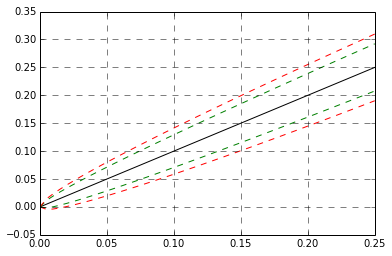

In [20]:
p = linspace(0,0.25,50)
sd = list(map(f, p))
sd2 = list(map(f2, p))
plot (p,p, 'k')
plot (p,p-sd, 'g--')
plot (p,p+sd, 'g--')
plot (p,p-sd2, 'r--')
plot (p,p+sd2, 'r--')
grid(b=True, which='major', color='k', linestyle='--')

For reference, the 2-sided tail probabilites as a function of $z$ (the way to read it is as follows: the probability of a Normal distribution being 2 standard deviations away from its mean to either side is about 0.05, or 5%). Saying it the other way round, a two-standard-deviation difference corresponds to about 95% confidence

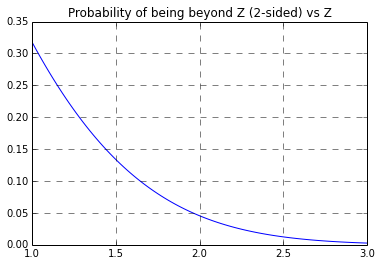

In [21]:
z=linspace(1.,3,100)
plot(z,1. - (norm.cdf(z)-norm.cdf(-z)))
grid(b=True, which='major', color='k', linestyle='--')
plt.title("Probability of being beyond Z (2-sided) vs Z")

## Using Monte Carlo
we also need some additional parameters for our Monte Carlo

In [31]:
number_of_tries = 1000

We do some intermediate calculations...

In [32]:
N_female = int (N_people * ratio_female)
N_male = N_people - N_female

...and then generate our random numbers...

In [33]:
data_male = np.random.binomial(n=1, p=proba, size=(number_of_tries, N_male))
data_female = np.random.binomial(n=1, p=proba, size=(number_of_tries, N_female))

...that we then reduce in one dimension (ie, over that people in the sample) to obtain our estimator for the probas for males and females as well as the difference. On the differences finally we look at the mean (should be zero-ish) and the standard deviation (should be consistent with the numbers above)

In [34]:
proba_male = map(numpy.mean, data_male)
proba_female = map(numpy.mean, data_female)
proba_diff = list((pm-pf) for pm,pf in zip(proba_male, proba_female))
np.mean(proba_diff), np.std(proba_diff)

(0.0011247619047619036, 0.04655510707277806)